## Data Loading and Initial Look

* Load the data.


In [2]:
# **Step 1: Install Kaggle API and Set Up Credentials**
# Install the Kaggle library
!pip install kaggle --quiet

# Import necessary library for JSON handling
import json

# Write the Kaggle API token to a file
kaggle_token = {"username": "gadaum", "key": "573b3d3a375973d34277c756052023f0"}

with open("kaggle.json", "w") as f:
    json.dump(kaggle_token, f)

# Set up Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **Step 2: Download and Extract the Dataset**
!kaggle datasets download -d uciml/mushroom-classification

import zipfile

with zipfile.ZipFile("mushroom-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

# **Step 3: Load the Dataset**
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv("mushrooms.csv")
print("Dataset loaded successfully!")
print(data.head())

Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification
License(s): CC0-1.0
  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 50.6MB/s]
Dataset loaded successfully!
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b 

Count the number of rows (data points) and features.

In [3]:
# Display the number of rows (data points) and features (columns)
print(f"Number of rows: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")

Number of rows: 8124
Number of features: 23


Any missing values?

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0] if not missing_values.empty else "No missing values found.")



Missing values per column:
Series([], dtype: int64)


**For** classification is there class imbalance?

In [5]:
# For classification, check the class distribution
class_counts = data['class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

#there is roughle equal instances on either side so there is no imbalance


Class Distribution:
class
e    4208
p    3916
Name: count, dtype: int64


* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [6]:
#Classification Target: The class column is encoded as 0 (Edible) and 1 (Poisonous)

## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression:
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

1. Histograms for Categorical Features


Feature Summary:
Feature: class, Unique Values: ['p' 'e'], Count: 2
Feature: cap-shape, Unique Values: ['x' 'b' 's' 'f' 'k' 'c'], Count: 6
Feature: cap-surface, Unique Values: ['s' 'y' 'f' 'g'], Count: 4
Feature: cap-color, Unique Values: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'], Count: 10
Feature: bruises, Unique Values: ['t' 'f'], Count: 2
Feature: odor, Unique Values: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'], Count: 9
Feature: gill-attachment, Unique Values: ['f' 'a'], Count: 2
Feature: gill-spacing, Unique Values: ['c' 'w'], Count: 2
Feature: gill-size, Unique Values: ['n' 'b'], Count: 2
Feature: gill-color, Unique Values: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'], Count: 12
Feature: stalk-shape, Unique Values: ['e' 't'], Count: 2
Feature: stalk-root, Unique Values: ['e' 'c' 'b' 'r' '?'], Count: 5
Feature: stalk-surface-above-ring, Unique Values: ['s' 'f' 'k' 'y'], Count: 4
Feature: stalk-surface-below-ring, Unique Values: ['s' 'f' 'y' 'k'], Count: 4
Feature: stalk-color-abo

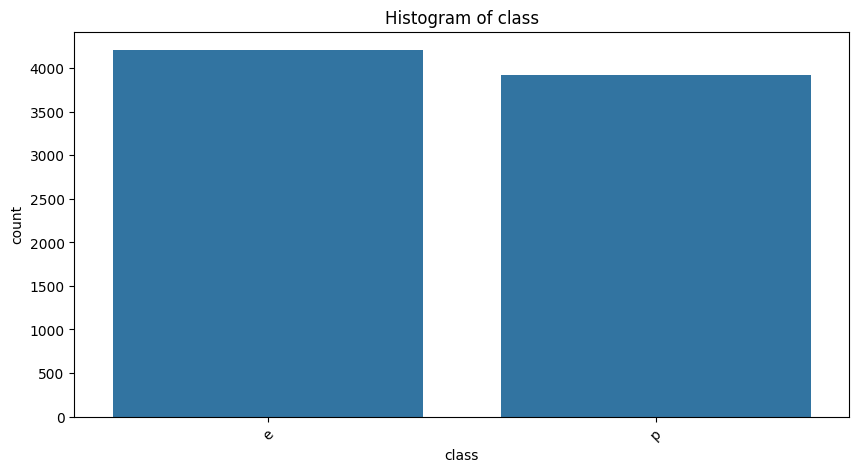

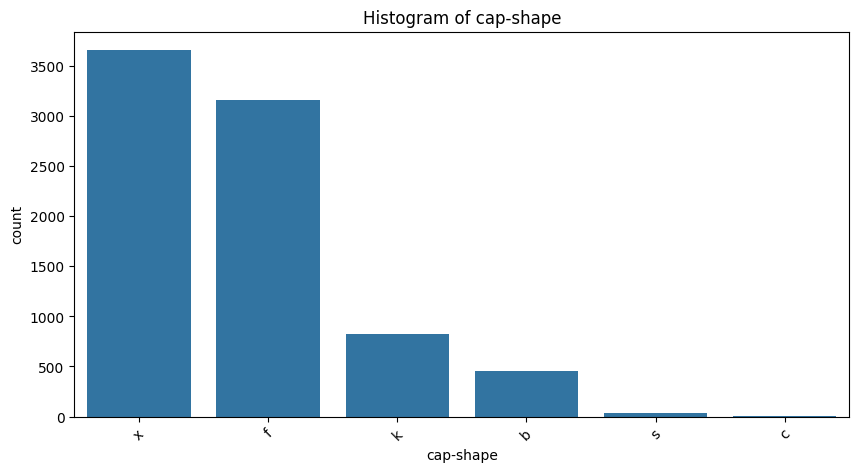

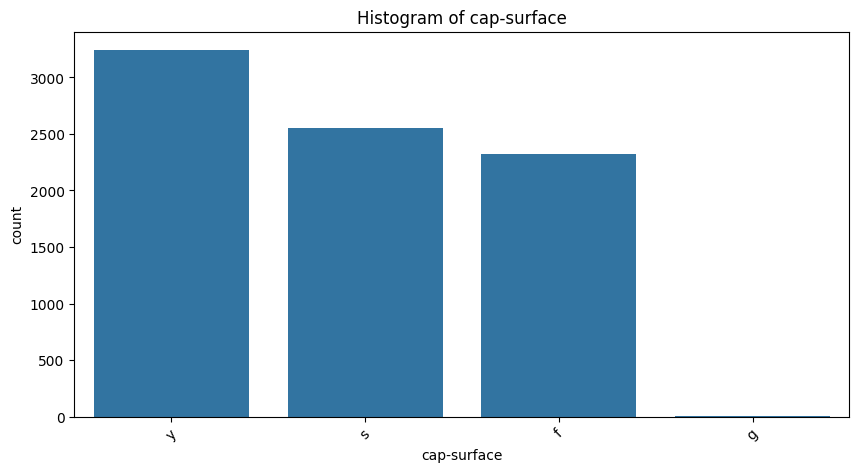

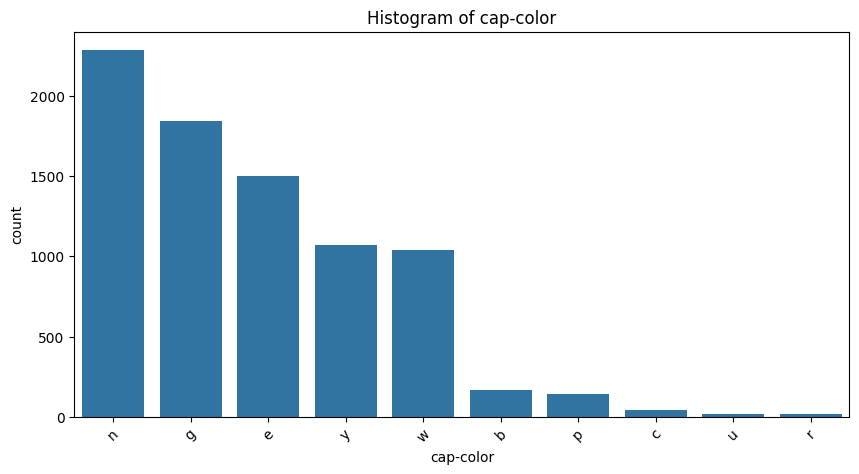

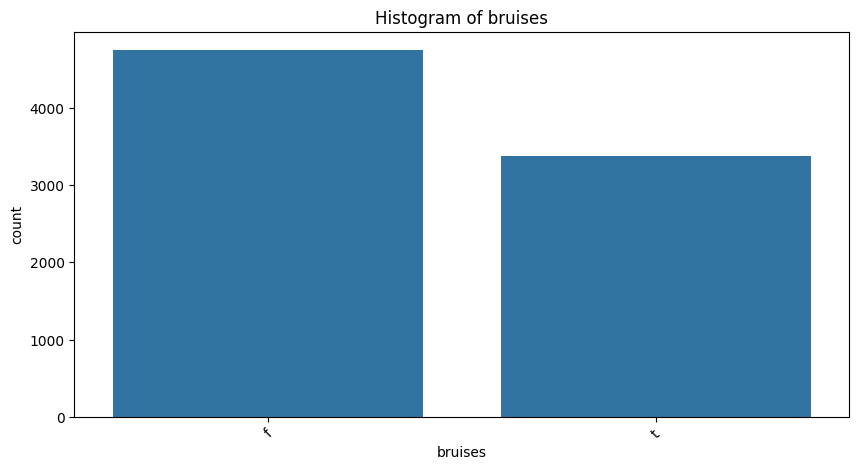

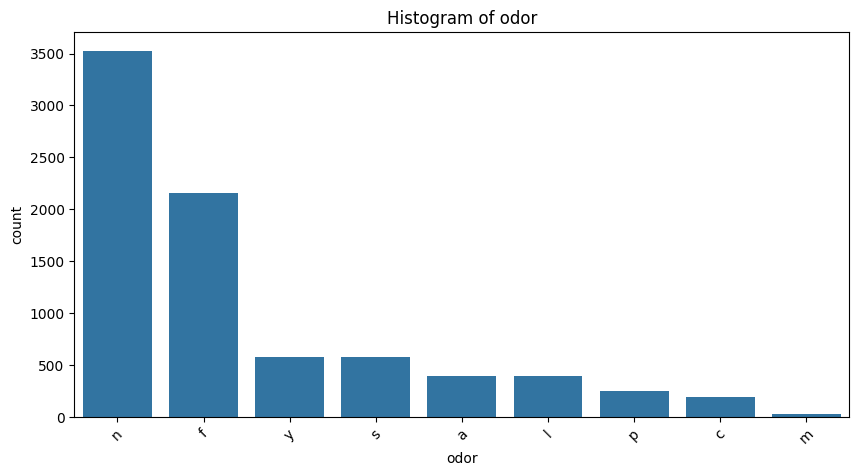

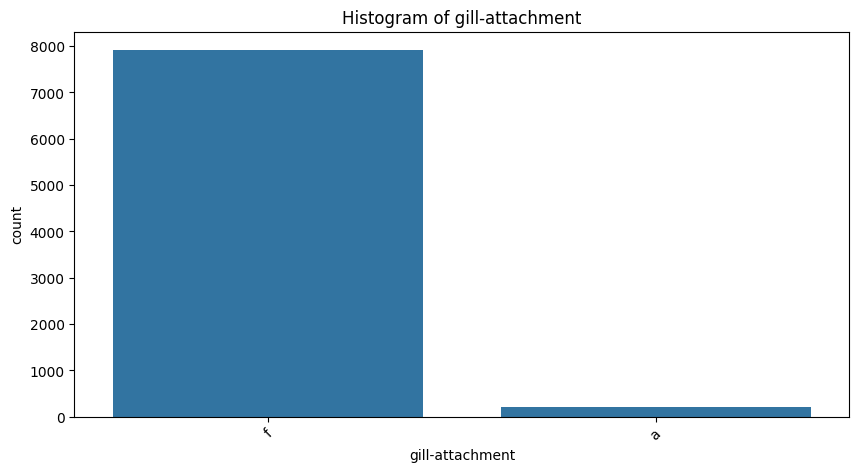

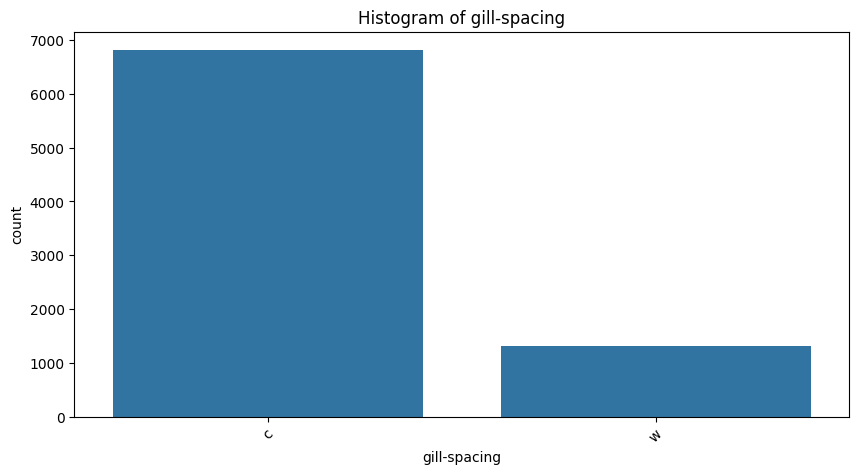

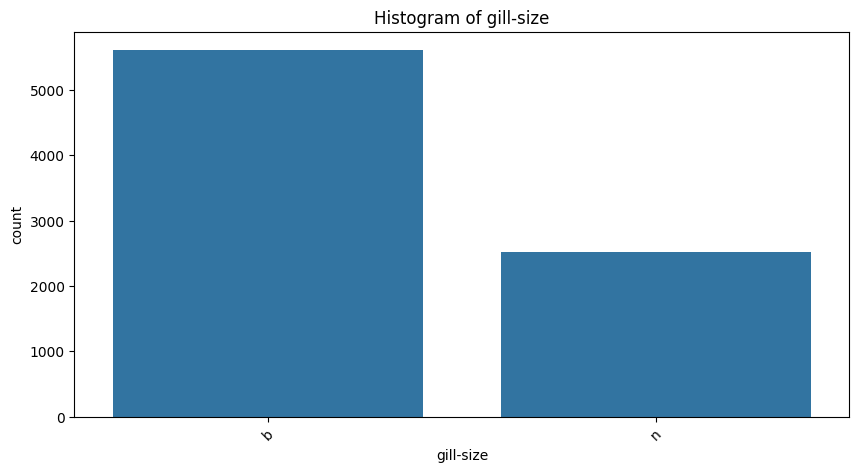

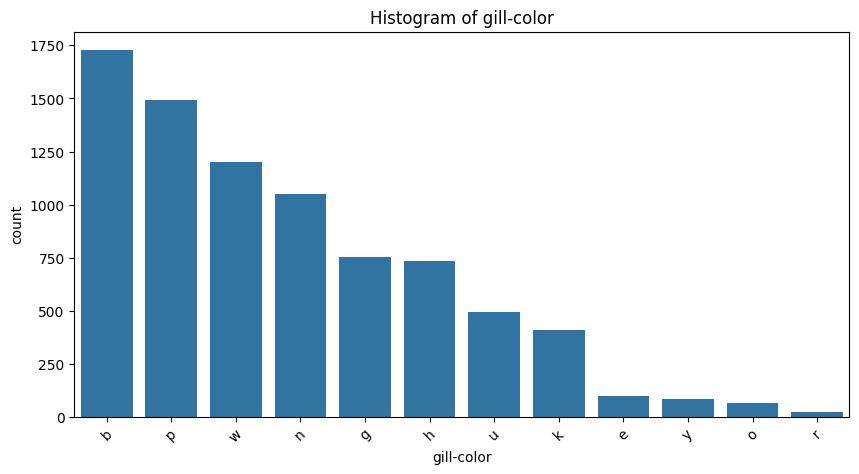

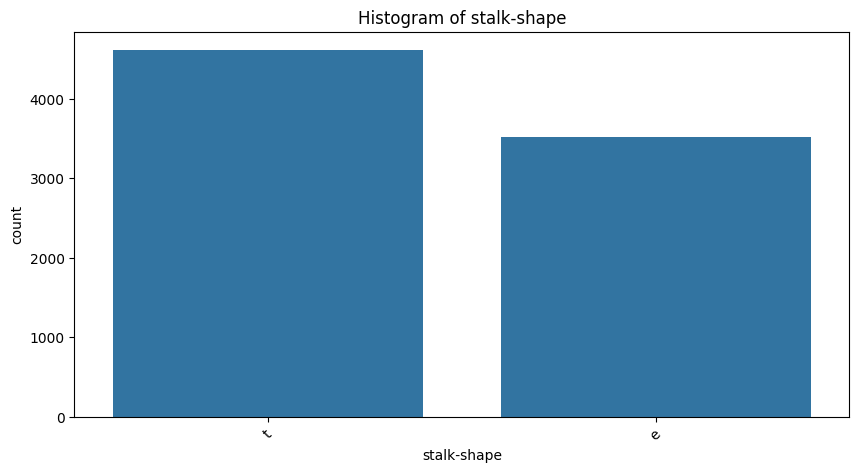

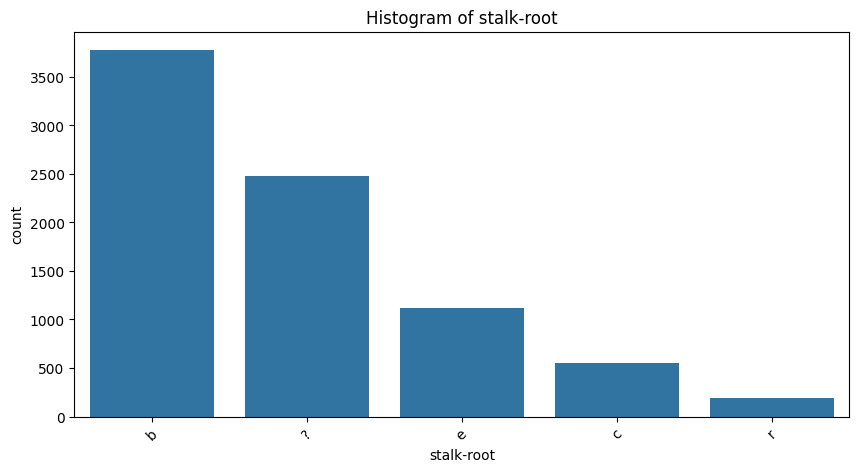

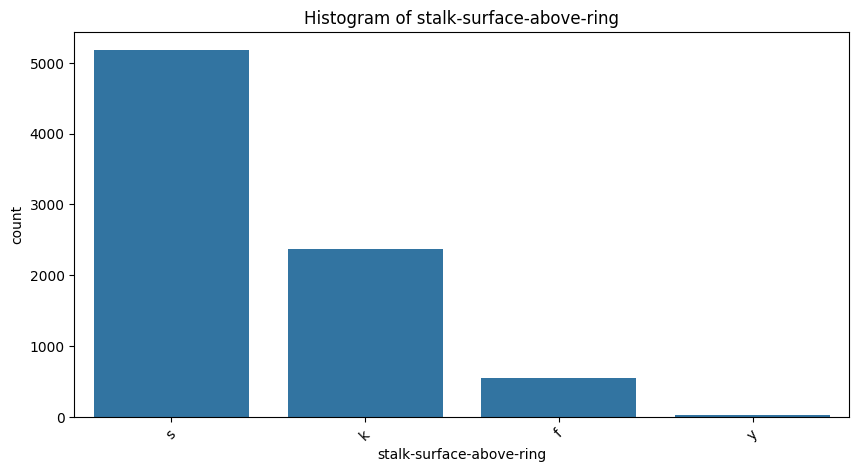

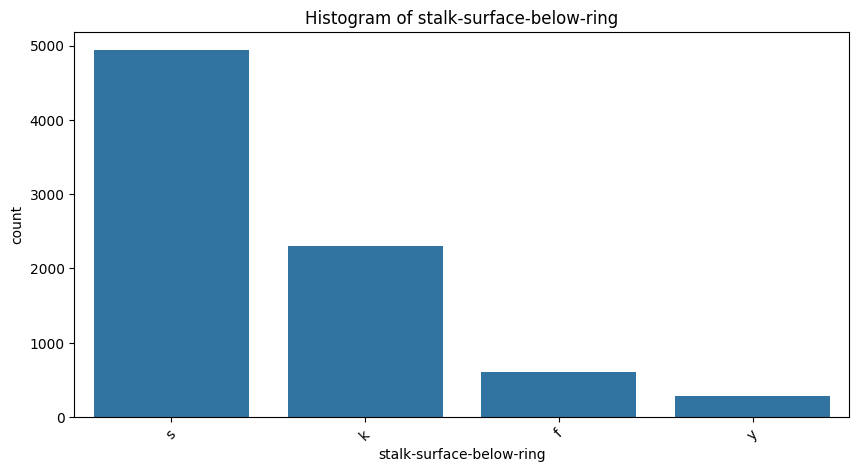

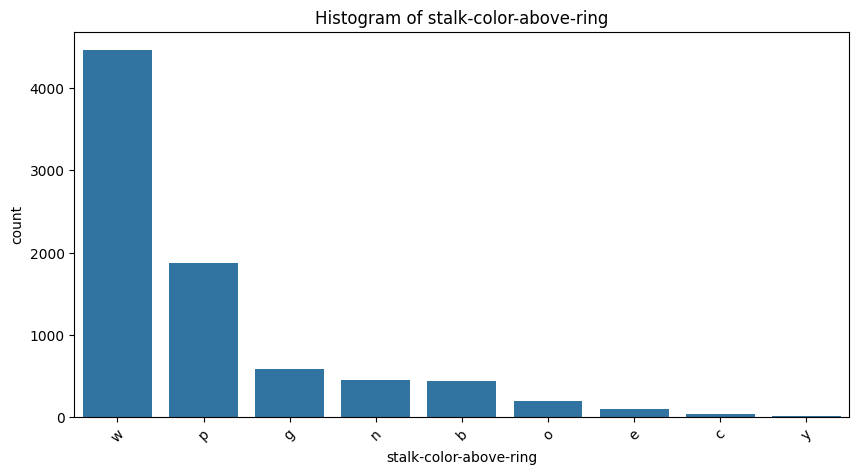

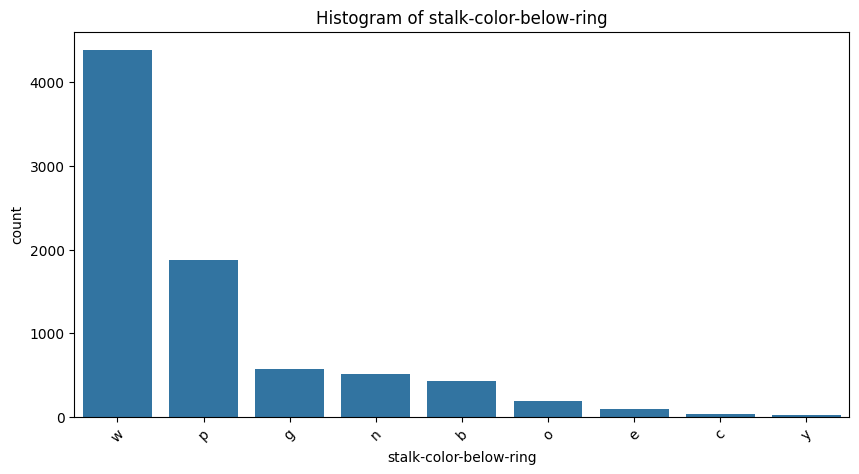

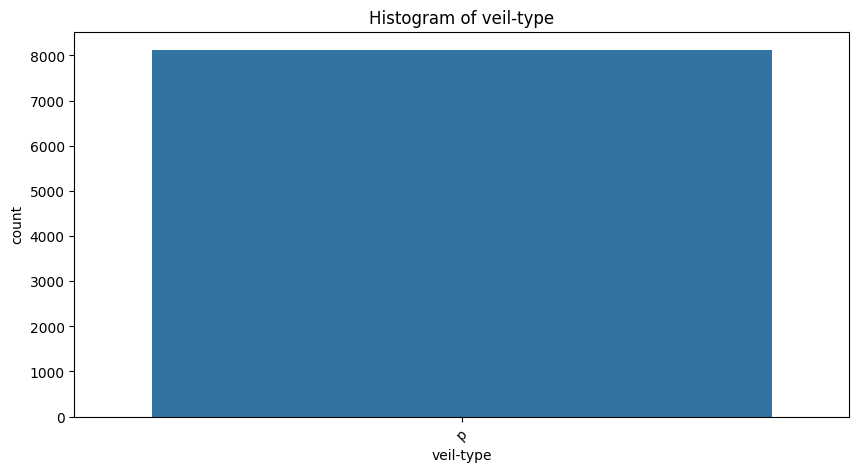

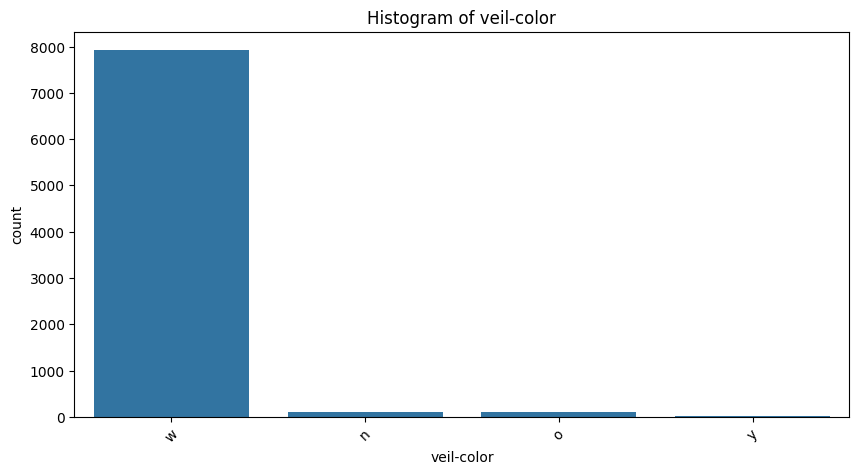

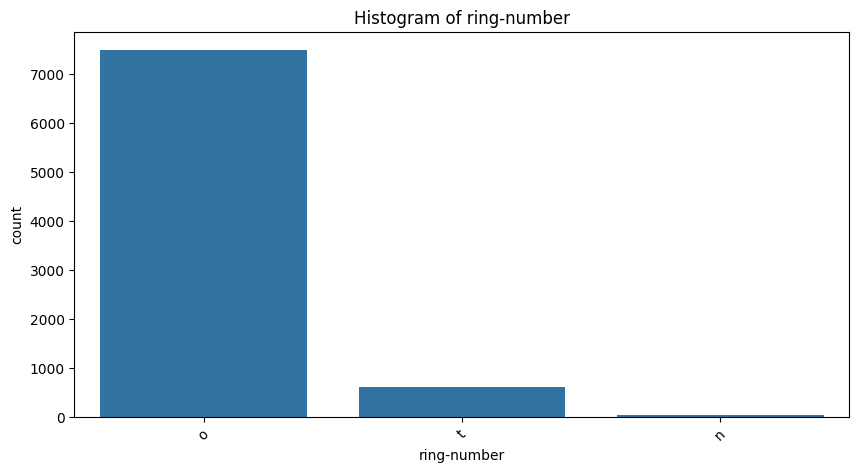

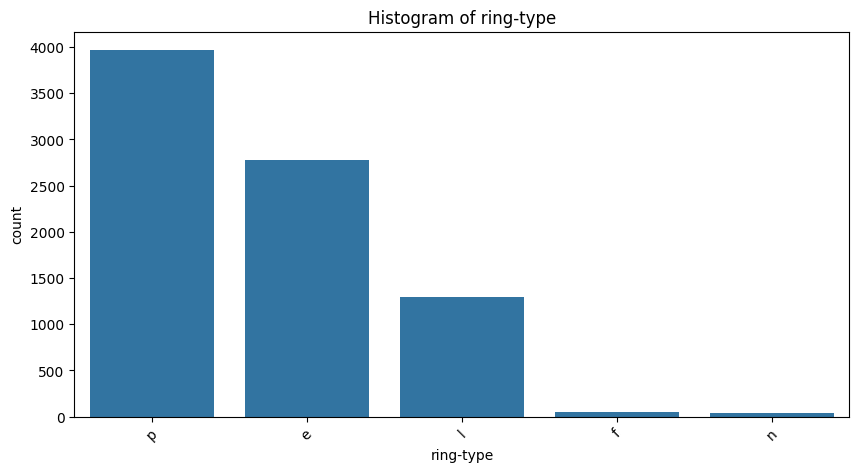

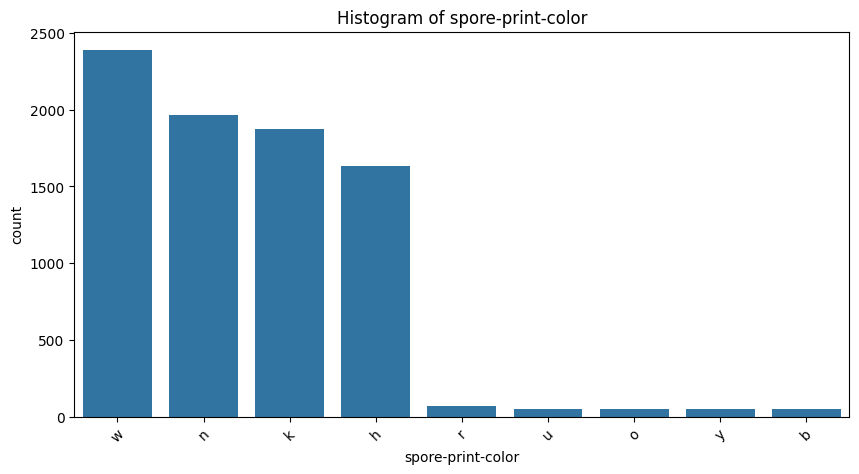

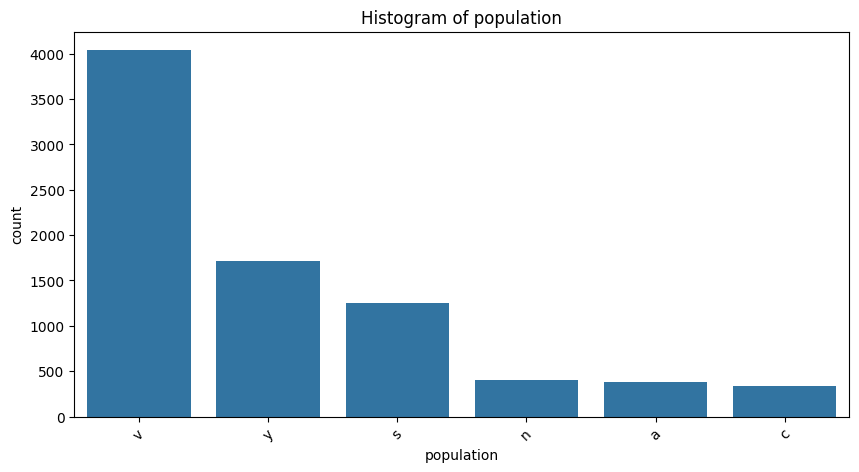

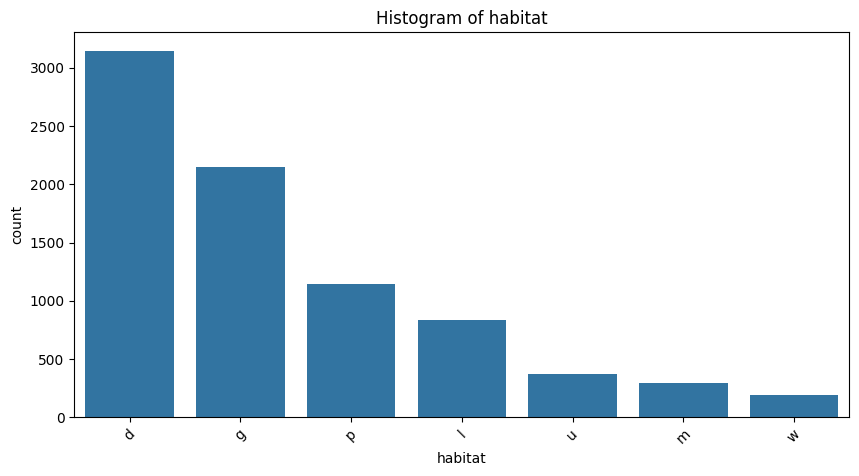

In [7]:
# Summarize feature types and possible values
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

feature_summary = []
for feature in categorical_features:
    unique_values = data[feature].unique()
    feature_summary.append({
        "Feature": feature,
        "Unique Values": unique_values,
        "Num Unique": len(unique_values)
    })

# Display the summary
print("\nFeature Summary:")
for entry in feature_summary:
    print(f"Feature: {entry['Feature']}, Unique Values: {entry['Unique Values']}, Count: {entry['Num Unique']}")

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=feature, order=data[feature].value_counts().index)
    plt.title(f"Histogram of {feature}")
    plt.xticks(rotation=45)
    plt.show()

2. Compare Features by Class

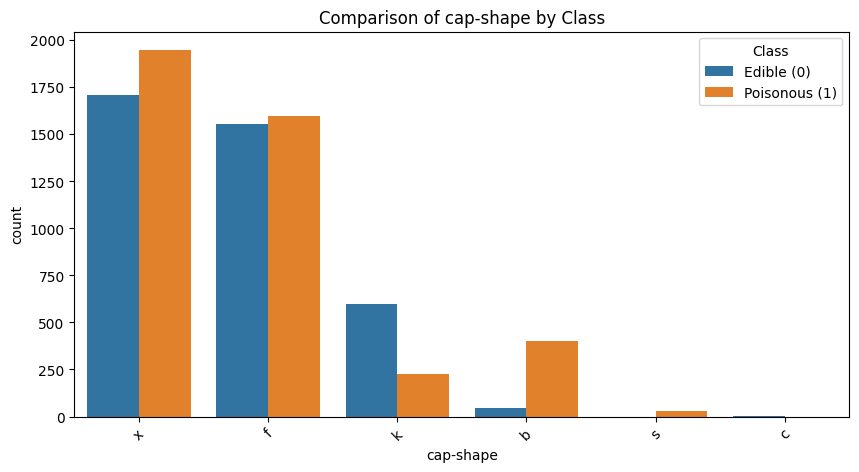

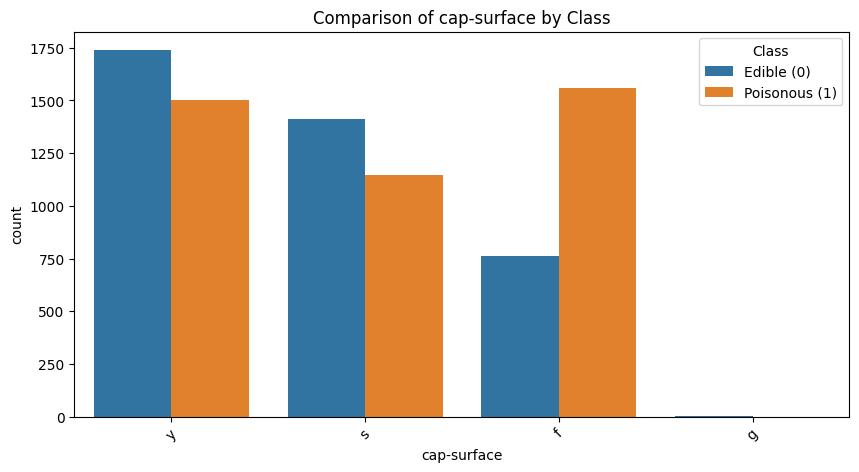

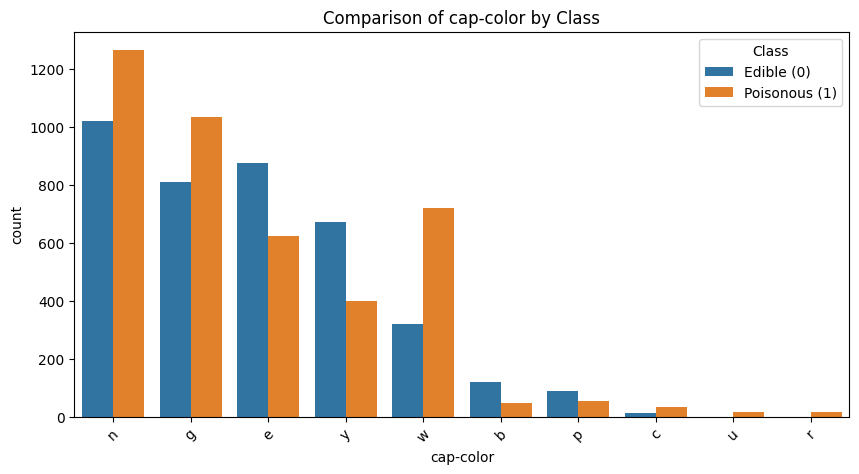

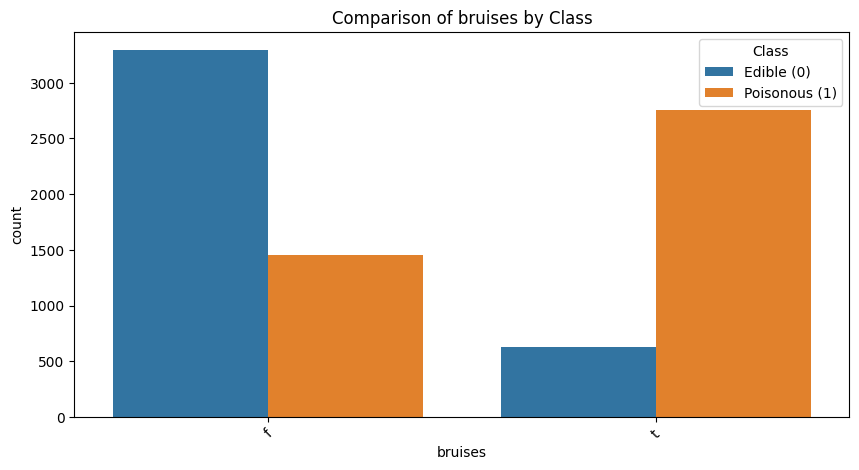

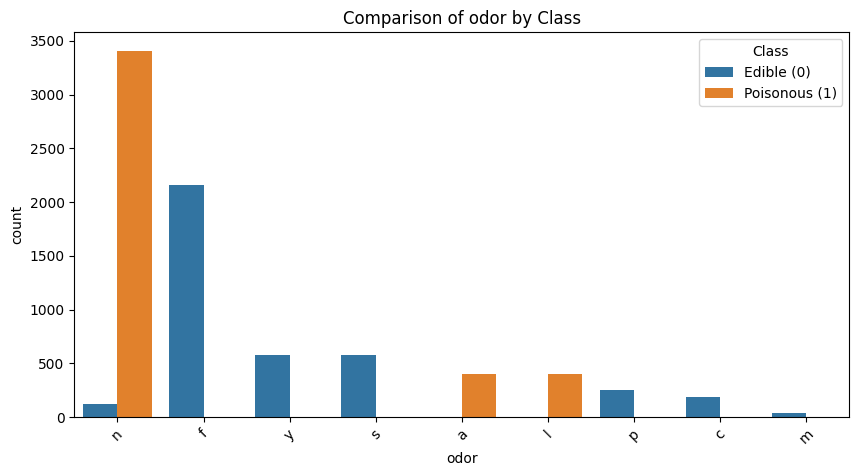

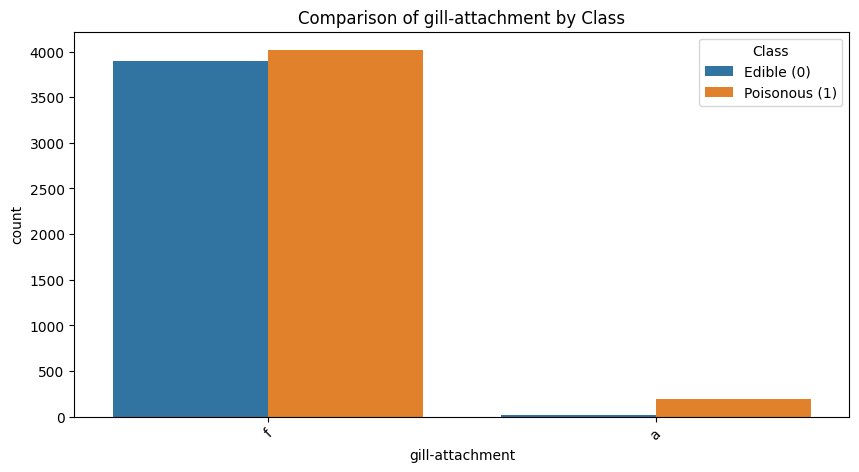

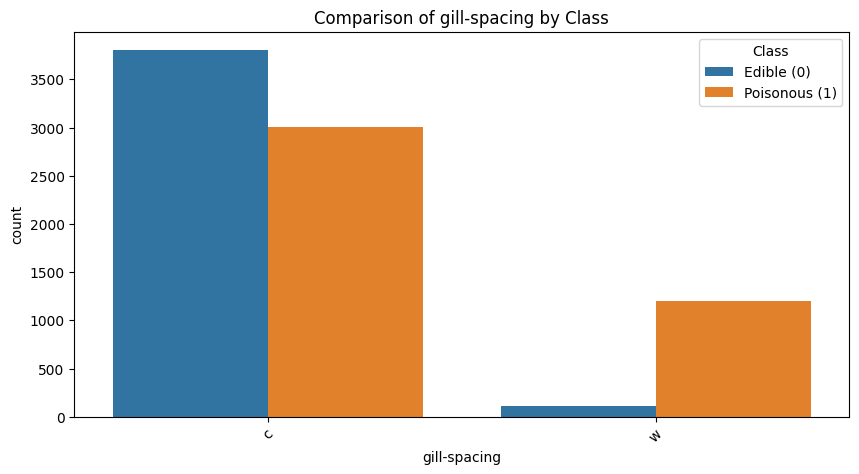

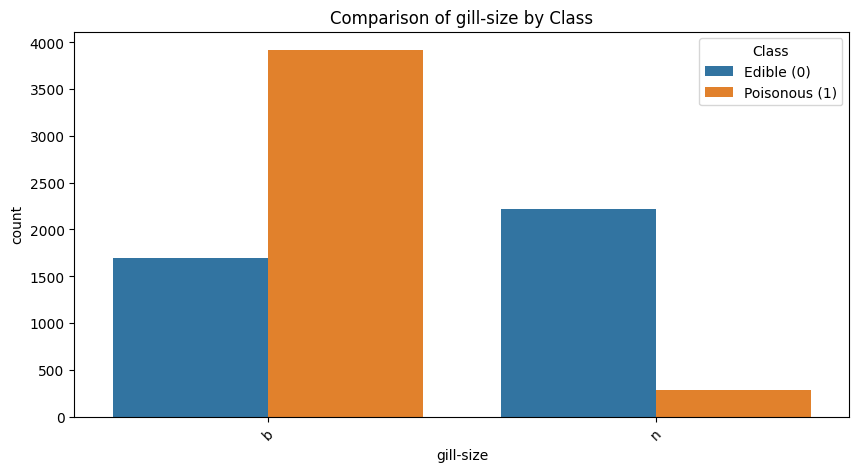

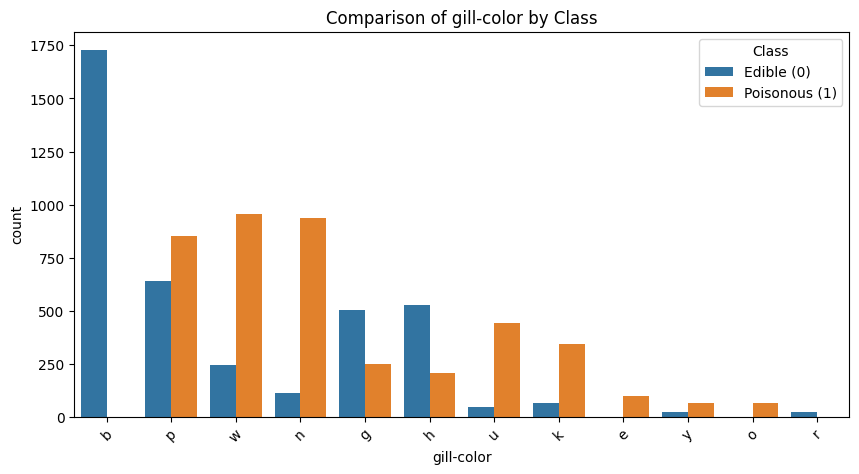

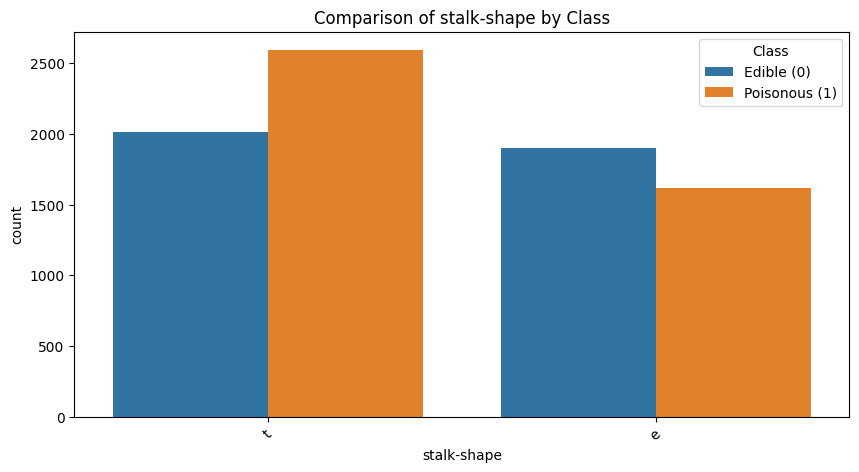

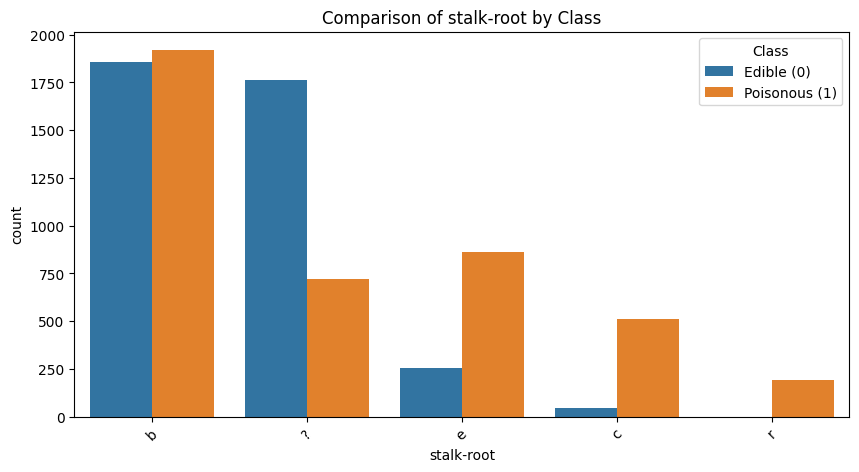

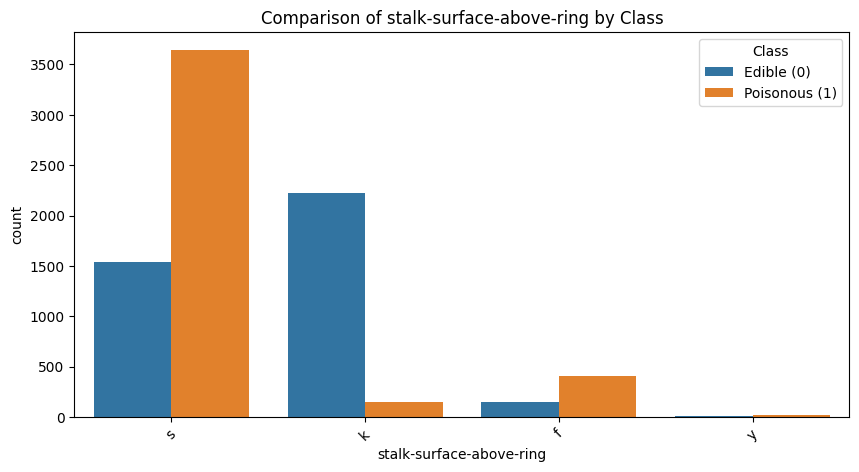

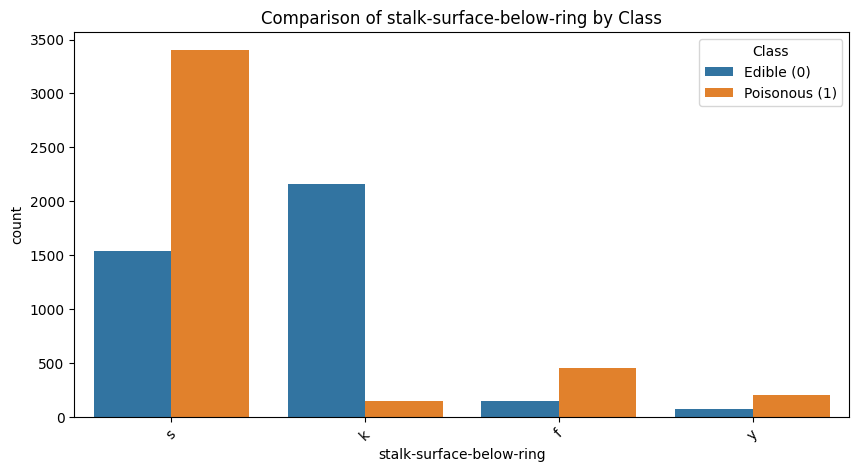

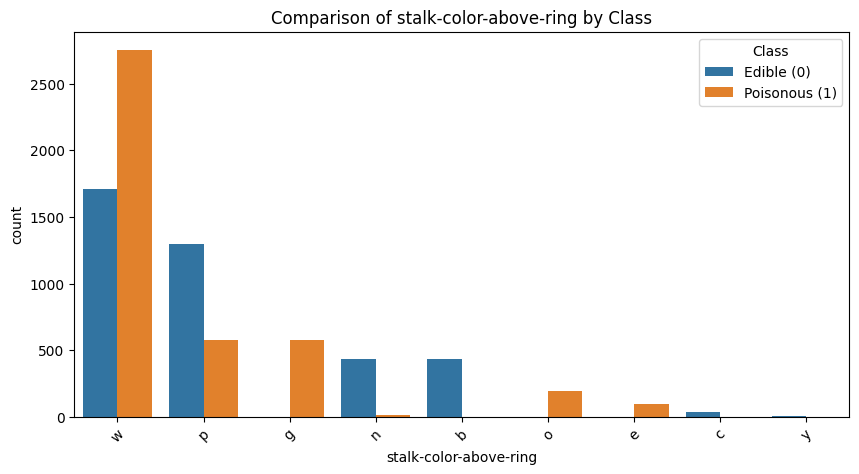

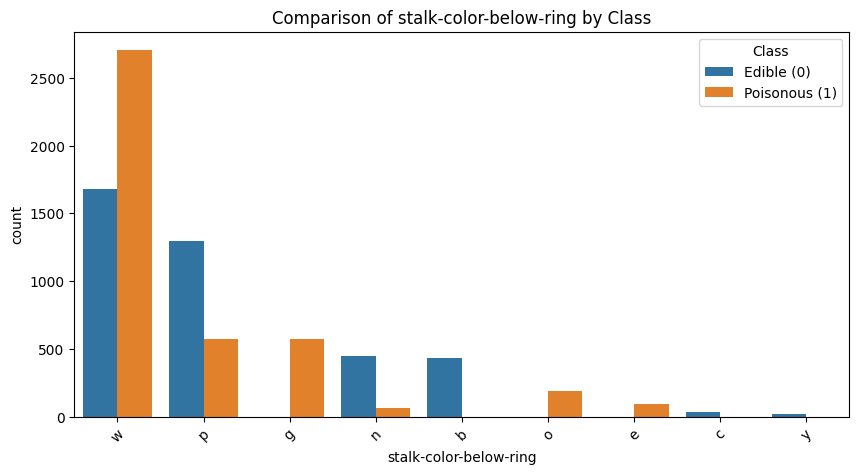

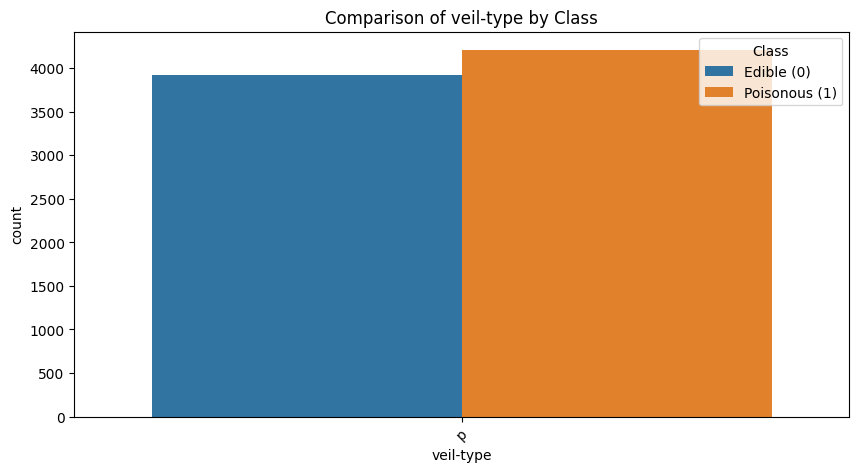

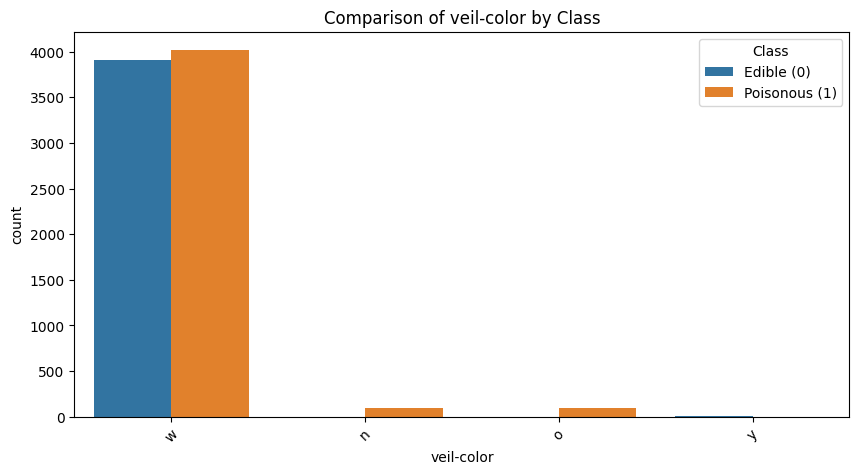

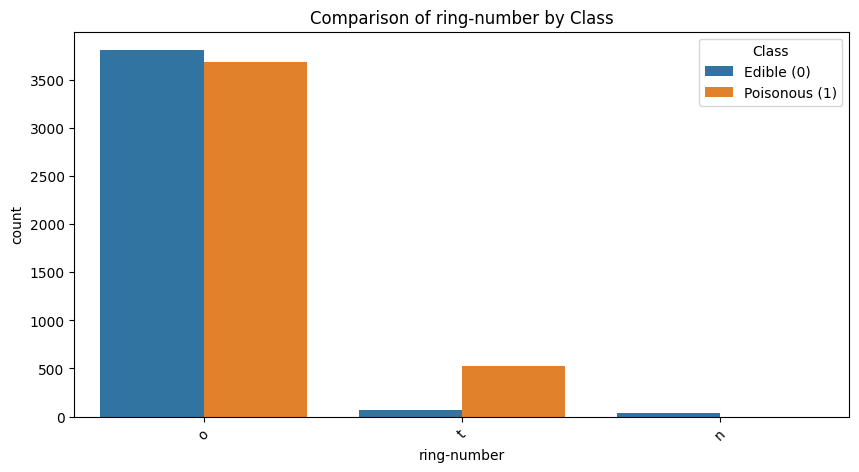

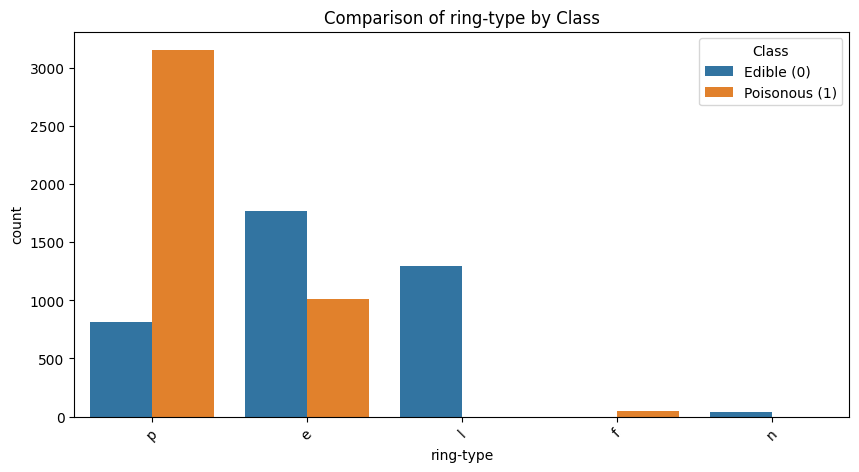

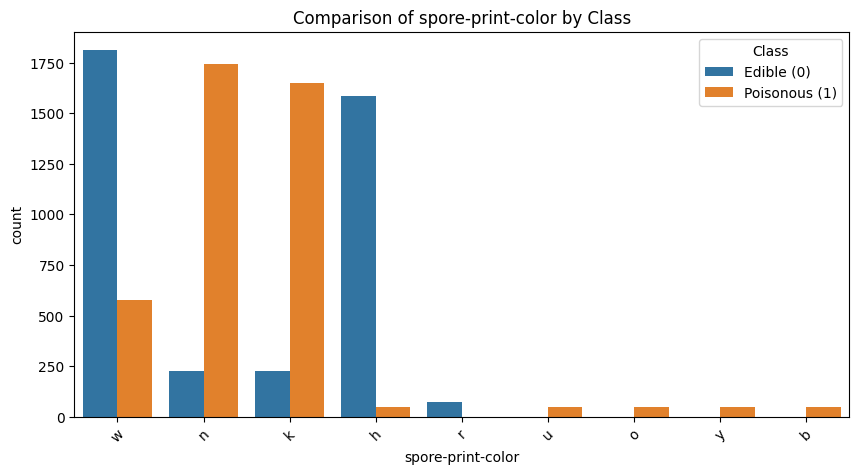

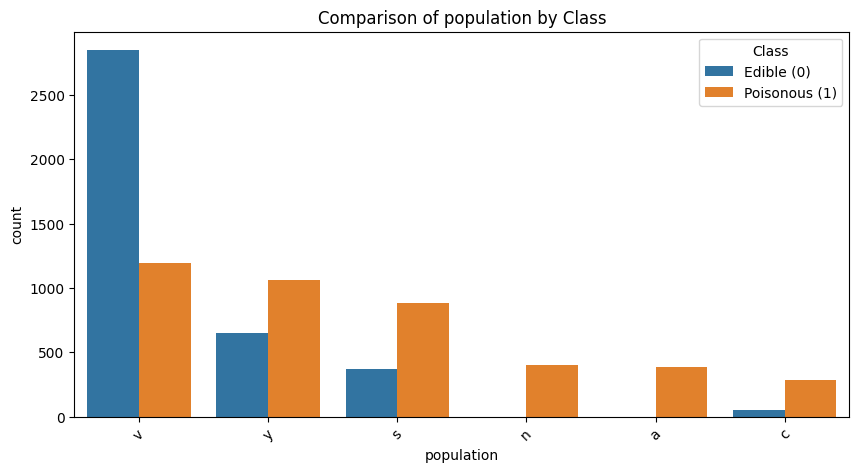

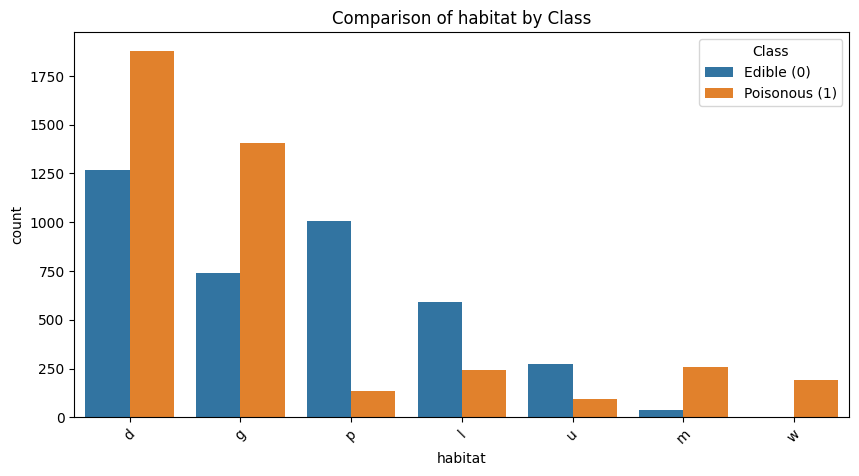

In [8]:
# Compare each feature's distribution between classes
for feature in categorical_features:
    if feature != 'class':  # Skip the target column
        plt.figure(figsize=(10, 5))
        sns.countplot(data=data, x=feature, hue='class', order=data[feature].value_counts().index)
        plt.title(f"Comparison of {feature} by Class")
        plt.xticks(rotation=45)
        plt.legend(title="Class", labels=["Edible (0)", "Poisonous (1)"])
        plt.show()

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature.
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

1. Data Cleaning

In [9]:
# Check for and remove duplicated rows
print(f"Number of duplicated rows: {data.duplicated().sum()}")
data = data.drop_duplicates()

# Encode the target column ('class'): edible as 0, poisonous as 1
data['class'] = data['class'].map({'e': 0, 'p': 1})
print("\nTarget column after encoding:")
print(data['class'].value_counts())


Number of duplicated rows: 0

Target column after encoding:
class
0    4208
1    3916
Name: count, dtype: int64


2. One-Hot Encode Categorical Features

In [10]:
# One-hot encode all categorical features except 'class'
data_encoded = pd.get_dummies(data, columns=[col for col in categorical_features if col != 'class'], drop_first=True)
print("\nData after one-hot encoding:")
print(data_encoded.head())



Data after one-hot encoding:
   class  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0      1        False        False        False        False         True   
1      0        False        False        False        False         True   
2      0        False        False        False        False        False   
3      1        False        False        False        False         True   
4      0        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  ...  \
0          False           True          False        False  ...   
1          False           True          False        False  ...   
2          False           True          False        False  ...   
3          False          False           True        False  ...   
4          False           True          False        False  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0         False          T

3. Split Data into Training, Validation, and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

# Split into train, validation, and test sets (60-20-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("\nData split completed:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Data split completed:
Training set size: 4874 samples
Validation set size: 1625 samples
Test set size: 1625 samples


## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


1. Train ML Algorithm

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("\nModel training completed.")



Model training completed.


2. Evaluate Performance on Validation Sample

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on validation data
y_val_pred = rf_model.predict(X_val)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Display classification report
print("\nClassification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))



Validation Accuracy: 1.0000

Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



3. Apply ML to the Challenge Test Set

In [14]:
# Predict on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Generate a submission file if needed
submission = pd.DataFrame({'Id': X_test.index, 'Predicted': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created as 'submission.csv'")


Test Accuracy: 1.0000
Submission file created as 'submission.csv'


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("\nDecision Tree model training completed.")

# Make predictions on validation data
dt_y_val_pred = dt_model.predict(X_val)

# Calculate validation accuracy
dt_val_accuracy = accuracy_score(y_val, dt_y_val_pred)
print(f"\nDecision Tree Validation Accuracy: {dt_val_accuracy:.4f}")

# Display classification report
print("\nDecision Tree Classification Report (Validation Data):")
print(classification_report(y_val, dt_y_val_pred))

# Predict on the test set
dt_y_test_pred = dt_model.predict(X_test)

# Calculate test accuracy
dt_test_accuracy = accuracy_score(y_test, dt_y_test_pred)
print(f"\nDecision Tree Test Accuracy: {dt_test_accuracy:.4f}")

# Initialize and train a Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)

print("\nGradient Boosting Classifier model training completed.")

# Make predictions on validation data
gbc_y_val_pred = gbc_model.predict(X_val)

# Calculate validation accuracy
gbc_val_accuracy = accuracy_score(y_val, gbc_y_val_pred)
print(f"\nGradient Boosting Validation Accuracy: {gbc_val_accuracy:.4f}")

# Display classification report
print("\nGradient Boosting Classification Report (Validation Data):")
print(classification_report(y_val, gbc_y_val_pred))

# Predict on the test set
gbc_y_test_pred = gbc_model.predict(X_test)

# Calculate test accuracy
gbc_test_accuracy = accuracy_score(y_test, gbc_y_test_pred)
print(f"\nGradient Boosting Test Accuracy: {gbc_test_accuracy:.4f}")

# Generate a submission file for Gradient Boosting Classifier
submission_gbc = pd.DataFrame({'Id': X_test.index, 'Predicted': gbc_y_test_pred})
submission_gbc.to_csv('submission_gbc.csv', index=False)
print("Submission file created as 'submission_gbc.csv'")



Decision Tree model training completed.

Decision Tree Validation Accuracy: 1.0000

Decision Tree Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Decision Tree Test Accuracy: 1.0000

Gradient Boosting Classifier model training completed.

Gradient Boosting Validation Accuracy: 0.9982

Gradient Boosting Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Gradi